## Задача
#### будем пытаться предсказать совершение покупки пользователем во время его сессии на сайте некоторого интернет-магазина.

#### Сессия на сайте — это временной интервал, в течение которого происходит взаимодействие пользователя с сайтом. Отсчёт сессии стартует сразу после перехода на сайт и завершается сразу после его закрытия или при отсутствии активных действий в течение некоторого периода времени.

### Мы не будем стремиться достичь наивысшего качества предсказания совершения покупки. Наша цель — отработать навыки работы с несбалансированными данными и применение методов валидации для оценки качества моделей.

In [23]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import metrics #метрики
from sklearn import model_selection #методы разделения и валидации
from sklearn import ensemble #ансамбли

plt.style.use('seaborn') #стиль отрисовки seaborn
%matplotlib inline

C:\Users\insps\AppData\Local\Temp\ipykernel_8456\2412469314.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn') #стиль отрисовки seaborn


In [9]:
RANDOM_STATE = 42
URL = 'https://lms.skillfactory.ru/assets/courseware/v1/76a66bafef0a7ce54bd384d9e91695bc/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/online_shoppers_intention.zip'

## Данные 

### Набор данных о покупательских намерениях онлайн-покупателей

#### Набор данных состоит из векторов признаков, принадлежащих 12 330 сеансам. Набор данных был сформирован таким образом, чтобы каждая сессия будет принадлежать другому пользователю в течение 1 года, чтобы избежать любая склонность к конкретной кампании, особому дню, пользователю профиль или период.

- "Administrative" -  Это количество страниц данного типа (административных), которые посетил пользователь. 
- "Administrative Duration" -  Это количество времени, проведенное в этой категории страниц.  
- "Informational" -  Это количество страниц данного типа (информационных), которые посетил пользователь.  
- "Informational Duration" - Это количество времени, проведенное в этой категории страниц.  
- "Product Related" -  Это количество страниц данного типа (связанных с товаром), которые посетил пользователь.  
- "ProductRelation_Duration" -  Это количество времени, проведенное в этой категории страниц.  
- "BounceRates" -   Процент посетителей, которые заходят на веб-сайт через эту страницу и выходят без запуска каких-либо дополнительных задач.  
- "ExitRates" -  Процент просмотров страниц на веб-сайте, которые заканчиваются на этой конкретной странице.  
- "PageValues" -  Средняя ценность страницы, усредненная по ценности целевой страницы и/или завершению электронной коммерции.  
- "SpecialDay" -  Это значение представляет близость даты просмотра к особым дням или праздникам (например, Дню матери или Дню святого Валентина) в

In [10]:
shoppers_data = pd.read_csv(URL)
shoppers_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
print(shoppers_data.shape)

(12330, 18)


In [4]:
# Проверяем пропуски
shoppers_data.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

#### Теперь закодируем категориальные признаки с помощью простого горячего кодирования, используя уже знакомую нам функцию `get_dummies()`

In [5]:
dummy_data = pd.get_dummies(shoppers_data)
dummy_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


#### нам необходимо предсказать целевую переменную Revenue — признак покупки. Целевой признак является бинарным категориальным, то есть мы решаем задачу бинарной классификации. В первую очередь посмотрим на соотношение классов в данных

Sessions without purchase : 84.53%
Sessions with purchase: 15.47%


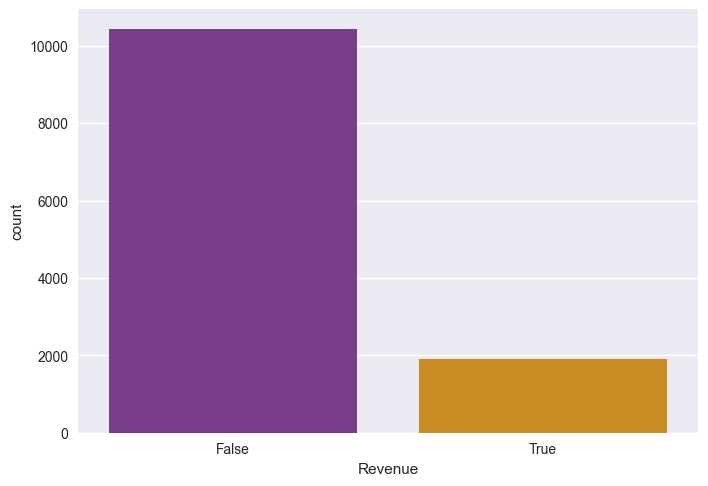

In [6]:
sns.countplot(x='Revenue', data=dummy_data, palette='CMRmap')
class_percent = dummy_data['Revenue'].value_counts(normalize=True) * 100
print('Sessions without purchase : {:.2f}%'.format(class_percent[0]))
print('Sessions with purchase: {:.2f}%'.format(class_percent[1]))

In [7]:
#  разделим набор данных на матрицу наблюдений X и вектор ответов y
X, y = dummy_data.drop('Revenue', axis=1), dummy_data['Revenue']

**Задание 6.2**

Для начала позаботимся о создании отложенной тестовой выборки.
Разделите выборку на тренировочную и тестовую в соотношении 80/20. Используйте разбиение, стратифицированное по целевому признаку. В качестве значения параметра random_state возьмите число 42.
Чему равно количество сессий на сайте в тренировочной и тестовой выборках?

In [8]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

print('Train shape: {}'.format(X_train.shape))
print('Valid shape: {}'.format(X_valid.shape))

Train shape: (9864, 28)
Valid shape: (2466, 28)


**Задание 6.3**

Коллеги посоветовали нам использовать случайный лес (Random Forest) для решения данной задачи. Давайте последуем их совету.
Создайте модель случайного леса. В качестве значения параметра random_state возьмите число 42. Остальные параметры оставьте по умолчанию.
Оцените качество такой модели с помощью кросс-валидации по пяти фолдам. Так как классы несбалансированы, используйте кросс-валидатор StratifiedKFold (перемешивать выборку не нужно).
Для проведения кросс-валидации используйте функцию cross_validate(). Набор данных (параметры X, y) — тренировочная выборка (X_train, y_train). Метрика — F1-score.
Чему равно среднее значение метрики  на тренировочных и валидационных фолдах? Ответ округлите до двух знаков после точки-разделителя.

In [25]:
#Создаём модель
model = ensemble.RandomForestClassifier(
    random_state=RANDOM_STATE #генератор случайных чисел
)
 
#Создаём объект кросс-валидатора k-fold со стратификацией
skf = model_selection.StratifiedKFold()
 
#Считаем метрики на кросс-валидации k-fold со стратификацией
cv_metrics = model_selection.cross_validate(
    estimator=model, #модель
    X=X_train, #матрица наблюдений X
    y=y_train, #вектор ответов y
    cv=skf, #кросс-валидатор
    scoring='f1', #метрика
    return_train_score=True #подсчёт метрики на тренировочных фолдах
)
 
print('Train k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean f1: {:.3f}'.format(np.mean(cv_metrics['test_score'])))

Train k-fold mean f1: 1.00
Valid k-fold mean f1: 0.637


**Задание 6.5**

Попробуем использовать несколько вариаций случайного леса и с помощью кривых обучения постараемся выбрать наилучшую из них.
Создайте список из трёх следующих моделей:
- Случайный лес из деревьев максимальной глубины 5.
- Случайный лес из деревьев максимальной глубины 7.
- Случайный лес из деревьев максимальной глубины 12.
Для всех трёх моделей количество деревьев в лесу (n_estimators) возьмите равным 200, количество объектов в листе (min_samples_leaf) — 5. Параметр random_state = 42. Остальные параметры оставьте по умолчанию.

Постройте для каждой из моделей кривую обучения.

In [27]:
models = [
ensemble.RandomForestClassifier(
    min_samples_leaf=5,
    n_estimators=200,
    max_depth=5,
    random_state=RANDOM_STATE #генератор случайных чисел
),
ensemble.RandomForestClassifier(
    min_samples_leaf=5,
    n_estimators=200,
    max_depth=7,
    random_state=RANDOM_STATE #генератор случайных чисел
),
ensemble.RandomForestClassifier(
    min_samples_leaf=5,
    n_estimators=200,
    max_depth=12,
    random_state=RANDOM_STATE #генератор случайных чисел
) 
]

In [30]:
# from helpers.plot_learning_curve import plot_learning_curve

def plot_learning_curve(model, X, y, cv, scoring="f1", ax=None, title=""):
    # Вычисляем координаты для построения кривой обучения
    train_sizes, train_scores, valid_scores = model_selection.learning_curve(
        estimator=model,  # модель
        X=X,  # матрица наблюдений X
        y=y,  # вектор ответов y
        cv=cv,  # кросс-валидатор
        scoring=scoring,  # метрика
    )
    # Вычисляем среднее значение по фолдам для каждого набора данных
    train_scores_mean = np.mean(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    # Если координатной плоскости не было передано, создаём новую
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 4))  # фигура + координатная плоскость
    # Строим кривую обучения по метрикам на тренировочных фолдах
    ax.plot(train_sizes, train_scores_mean, label="Train")
    # Строим кривую обучения по метрикам на валидационных фолдах
    ax.plot(train_sizes, valid_scores_mean, label="Valid")
    # Даём название графику и подписи осям
    ax.set_title(f"Learning curve:\n{title}", fontsize=10)
    ax.set_xlabel("Train data size")
    ax.set_ylabel("Score")
        # Устанавливаем отметки по оси абсцисс
    ax.xaxis.set_ticks(train_sizes)
    # Устанавливаем диапазон оси ординат
    ax.set_ylim(0, 1.05)
    # Отображаем легенду
    ax.legend();

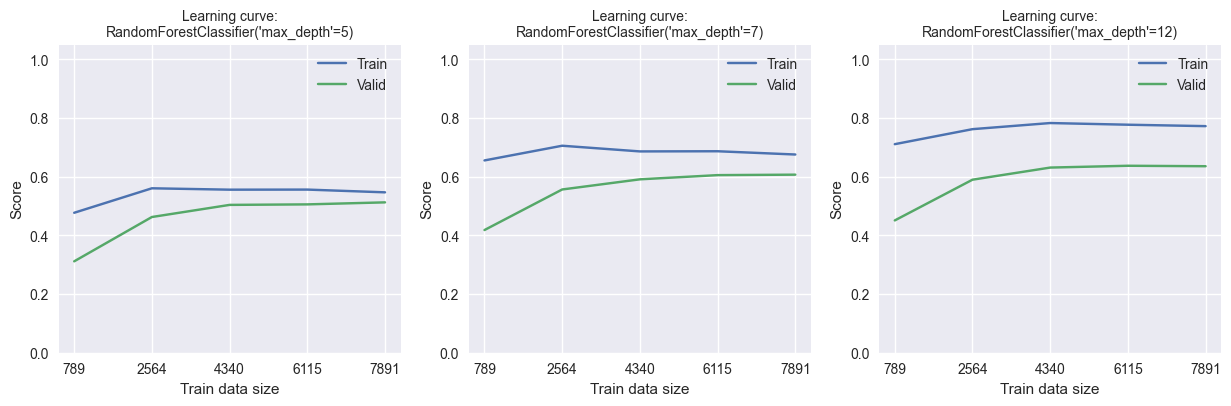

In [32]:
#Визуализируем кривые обучения
fig, axes = plt.subplots(1, 3, figsize=(15, 4)) #фигура + три координатных плоскости
#Создаём цикл по списку моделей и индексам этого списка
for i, model in enumerate(models): #i — текущий индекс, model — текущая модель
    plot_learning_curve(model, X_train, y_train, skf, ax=axes[i], title=model.__class__.__name__+ "('max_depth'=" + str(model.__dict__['max_depth']) + ")")

**Задание 6.6**

Обучите случайный лес с выбранной в предыдущем задании оптимальной глубиной на тренировочной выборке. Сделайте предсказание меток классов и выведите отчёт о метриках классификации.

In [33]:
model = ensemble.RandomForestClassifier(
    min_samples_leaf=5,
    n_estimators=200,
    max_depth=7,
    random_state=RANDOM_STATE
)
 
model.fit(X_train, y_train)
    #Делаем предсказание для каждой из выборок
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
#Рассчитываем метрику и заносим её в список
print('Train accuracy: {:.2f}'.format(metrics.accuracy_score(y_train, y_train_pred)))
print('Train accuracy: {:.2f}'.format(metrics.accuracy_score(y_valid, y_valid_pred)))

Train accuracy: 0.92
Train accuracy: 0.89
